In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("cleaned.csv")
df

,Company,Inches,Memory,OpSys,Price_euros,height,width,Clock,Weight_in_kg
0,Apple,13.3,8,macOS,1339.69,1600,2560,2.3,1.37
1,Apple,13.3,8,macOS,898.94,900,1440,1.8,1.34
2,HP,15.6,8,No OS,575.00,1080,1920,2.5,1.86
3,Apple,15.4,16,macOS,2537.45,1800,2880,2.7,1.83
4,Apple,13.3,8,macOS,1803.60,1600,2560,3.1,1.37
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,14.0,4,Windows 10,638.00,1080,1920,2.5,1.80
1299,Lenovo,13.3,16,Windows 10,1499.00,1800,3200,2.5,1.30
1300,Lenovo,14.0,2,Windows 10,229.00,768,1366,1.6,1.50
1301,HP,15.6,6,Windows 10,764.00,768,1366,2.5,2.19


In [3]:
x = df.drop("Price_euros",axis = 1)
y = df["Price_euros"]
x.shape,y.shape


((1303, 8), (1303,))

In [4]:
num_feat = x.select_dtypes(exclude = "object").columns
cat_feat = x.select_dtypes(include = "object").columns
print("num_feat :", num_feat)
print(".....................................")
print("cat_feat :",cat_feat)

num_feat : Index(['Inches', 'Memory', 'height', 'width', 'Clock', 'Weight_in_kg'], dtype='object')
.....................................
cat_feat : Index(['Company', 'OpSys'], dtype='object')


In [5]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_transformer = StandardScaler()
one_hot_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",one_hot_transformer,cat_feat),
        ("StandardScaler",num_transformer,num_feat)
    ]
)

x = preprocessor.fit_transform(x)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [7]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) 

     
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
     
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 369.5890
- Mean Absolute Error: 268.6993
- R2 Score: 0.7173
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 379.4365
- Mean Absolute Error: 273.8425
- R2 Score: 0.7165


Lasso
Model performance for Training set
- Root Mean Squared Error: 373.9851
- Mean Absolute Error: 272.8373
- R2 Score: 0.7105
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 386.1100
- Mean Absolute Error: 277.9381
- R2 Score: 0.7065


Ridge
Model performance for Training set
- Root Mean Squared Error: 370.4516
- Mean Absolute Error: 269.6895
- R2 Score: 0.7160
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 380.7794
- Mean Absolute Error: 274.0853
- R2 Score: 0.7145


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 277.8220
- Mean Absolute Error: 185.1969
- R2 Score: 0.

In [9]:
pd.DataFrame(list(zip(model_list,r2_list)),columns = ["Model_name","R2_score"]).sort_values(by = "R2_score")

,Model_name,R2_score
8,AdaBoost Regressor,0.624958
1,Lasso,0.706491
2,Ridge,0.714540
0,Linear Regression,0.716549
3,K-Neighbors Regressor,0.724365
4,Decision Tree,0.747563
5,Random Forest Regressor,0.786810
7,CatBoosting Regressor,0.814543
6,XGBRegressor,0.816867


In [10]:
model = Ridge()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
score = r2_score(y_test,y_pred) * 100
print("Accuracy of model is %.2f " %score)

Accuracy of model is 71.45 


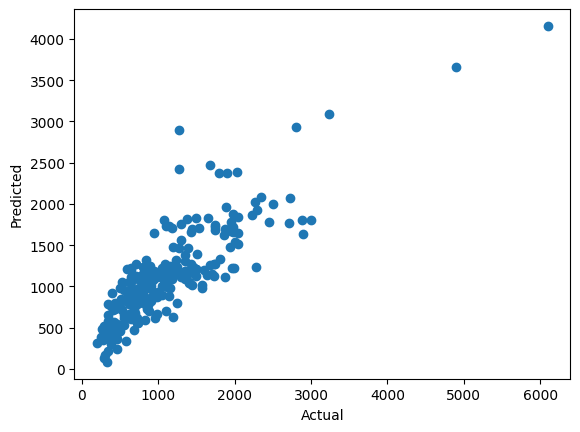

In [11]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Text(0.5, 1.0, 'Actual and Predicted Price')

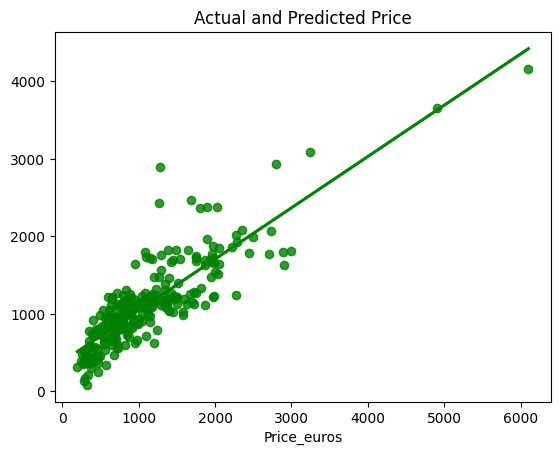

In [12]:
sns.regplot(x= y_test,y = y_pred,ci = None,color = "green")
plt.title("Actual and Predicted Price")

In [20]:
print(np.array(df.head(1).drop("Price_euros",axis = 1)).reshape(-1,1))

[['Apple']
 [13.3]
 [8]
 ['macOS']
 [1600]
 [2560]
 [2.3]
 [1.37]]
